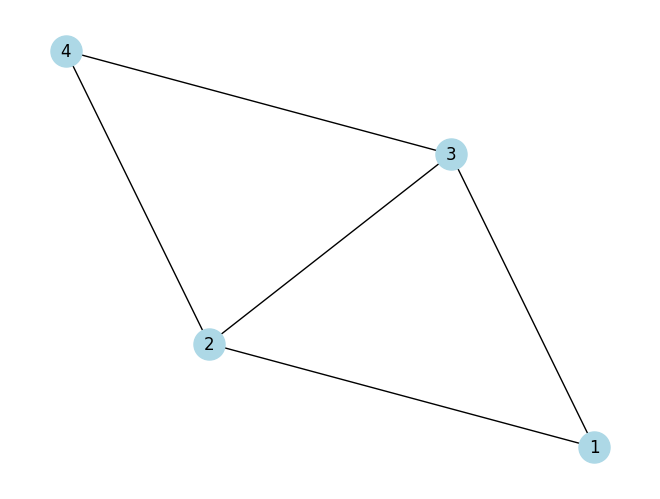

In [8]:
#импорт библиотек
import networkx as nx
import random
import matplotlib.pyplot as plt

#задание 2
#Создание графа
G = nx.Graph()

#добавление ребер
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]
G.add_edges_from(edges)

#Отображение графика
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)
plt.show()

In [46]:
#задание 3
# Создаем ориентированный граф
G = nx.DiGraph()

# Добавляем узлы
G.add_nodes_from(range(16))

# Добавляем ориентированные ребра
G.add_edges_from([(0, 1), (1, 0), (0, 2), (2, 0), (1, 3), (3, 1), (2, 3), (3, 2), (4, 5), (5, 4), (4, 6), (6, 4),
                  (5, 7), (7, 5), (6, 7), (7, 6), (0, 4), (4, 0), (1, 5), (5, 1), (2, 6), (6, 2), (3, 7), (7, 3)])

cycles = list(nx.simple_cycles(G))
print("Циклы")
print(cycles)


# Создаем неориентированный граф
G_undirected = nx.Graph(G)

# Находим базисные циклы
cycle_basis = nx.cycle_basis(G_undirected)
print("Циклы")
print(cycle_basis)

Циклы
[[0, 1], [0, 1, 3, 2], [0, 1, 3, 2, 6, 4], [0, 1, 3, 2, 6, 7, 5, 4], [0, 1, 3, 7, 5, 4, 6, 2], [0, 1, 3, 7, 5, 4], [0, 1, 3, 7, 6, 4], [0, 1, 3, 7, 6, 2], [0, 1, 5, 4, 6, 7, 3, 2], [0, 1, 5, 4, 6, 2], [0, 1, 5, 4], [0, 1, 5, 7, 6, 4], [0, 1, 5, 7, 6, 2], [0, 1, 5, 7, 3, 2], [0, 1, 5, 7, 3, 2, 6, 4], [0, 2], [0, 2, 3, 1], [0, 2, 3, 1, 5, 4], [0, 2, 3, 1, 5, 7, 6, 4], [0, 2, 3, 7, 5, 4], [0, 2, 3, 7, 5, 1], [0, 2, 3, 7, 6, 4, 5, 1], [0, 2, 3, 7, 6, 4], [0, 2, 6, 4, 5, 7, 3, 1], [0, 2, 6, 4, 5, 1], [0, 2, 6, 4], [0, 2, 6, 7, 5, 4], [0, 2, 6, 7, 5, 1], [0, 2, 6, 7, 3, 1], [0, 2, 6, 7, 3, 1, 5, 4], [0, 4, 5, 7, 6, 2], [0, 4, 5, 7, 6, 2, 3, 1], [0, 4, 5, 7, 3, 1], [0, 4, 5, 7, 3, 2], [0, 4, 5, 1], [0, 4, 5, 1, 3, 2], [0, 4, 5, 1, 3, 7, 6, 2], [0, 4, 6, 7, 5, 1], [0, 4, 6, 7, 5, 1, 3, 2], [0, 4, 6, 7, 3, 1], [0, 4, 6, 7, 3, 2], [0, 4, 6, 2], [0, 4, 6, 2, 3, 1], [0, 4, 6, 2, 3, 7, 5, 1], [0, 4], [1, 3], [1, 3, 2, 6, 4, 5], [1, 3, 2, 6, 7, 5], [1, 3, 7, 5], [1, 3, 7, 6, 4, 5], [1, 5, 4, 6

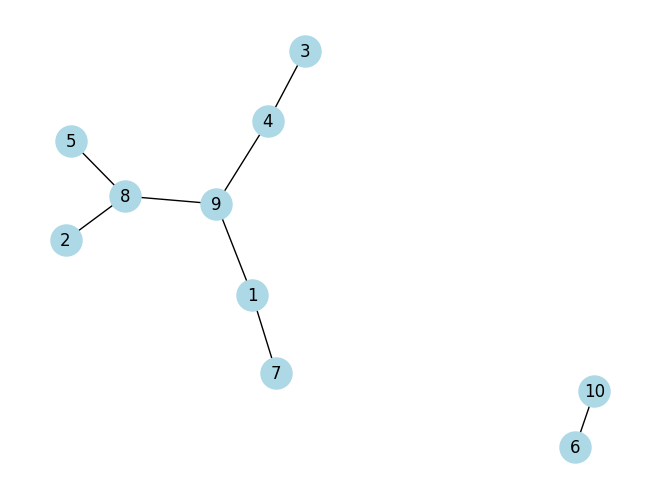

In [41]:
#Задание 4

#Создание графа
G = nx.Graph()

#Добавление ребер с вероятностью 0.1
for i in range(1, 11):
    for j in range(i + 1, 11):
        if random.random() < 0.1:
            G.add_edge(i, j)

#отображение графа
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500)
plt.show()

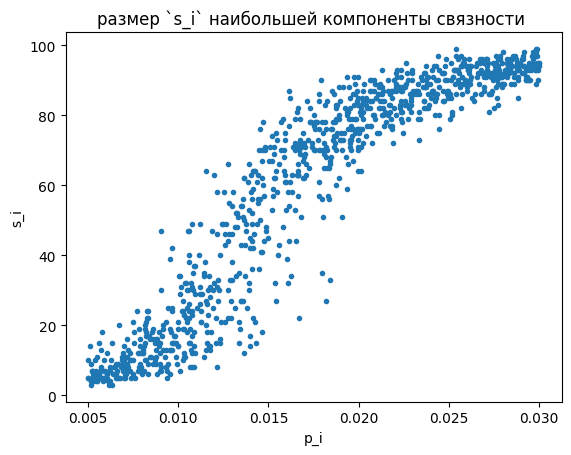

In [43]:
#задание 5
#Создание пустого списка для хранения результатов
results = []


for _ in range(1000):
    #Выбор случайной вероятности
    p = random.uniform(0.005, 0.03)

    #Создание случайного графа со 100 вершинами и выбранной вероятностью
    G = nx.erdos_renyi_graph(100, p)

    #Поиск связанных компонент
    components = list(nx.connected_components(G))

    #Поиск наиболее связанных
    max_size = max(len(component) for component in components)

    #Добавление результата в список
    results.append((p, max_size))


p_values, s_values = zip(*results)

#Построение графика
plt.plot(p_values, s_values, 'o', markersize=3)
plt.xlabel('p_i')
plt.ylabel('s_i')
plt.title('размер `s_i` наибольшей компоненты связности ')
plt.show()

In [ ]:
import vk_api
#import config
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

VK_TOKEN = 'tasha_n02'


#функция для получения списка друзей 
def get_friends(user_id):
    vk_session = vk_api.VkApi(token=VK_TOKEN)
    vk = vk_session.get_api()
  
    try:
        response = vk.friends.get(user_id=user_id, fields='nickname')
        friends = response['items']
        return friends
    except vk_api.exceptions.ApiError as e:
        print('Ошибка API:', e)
        return []
    
#функция для построения графа друзей 
def build_graph(user_id):
    friends = get_friends(user_id)
    G = nx.Graph()

    for friend in friends:
        G.add_edge(user_id, friend['id'])

    return G

#функция для визуализации графа 
def visualize_graph(G):
    pos = nx.spring_layout(G)
  
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color='r', node_size=500)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='b', arrows=False)

    plt.show()

#функция для выделения кластеров в графе 
def find_communities(G):
    best_partition = community.best_partition(G)
    communities = {}
    for node, community_id in best_partition.items():
        if community_id not in communities:
            communities[community_id] = []
        communities[community_id].append(node)
  
    return communities

if __name__ == '__main__':
    user_id = 'tasha_n02'

    G = build_graph(user_id)
    visualize_graph(G)

    communities = find_communities(G)
    print(communities)